# Analytics for Unstructured Data (F2025) Assignment 2
**Alex Edwards (aye274), Andrew White (aw43893), Bhagya Puppala (bp27573),Kumar Rishu (kr36546)**
**Prisca Varner (pv6684), Tommy Garner (tg25755)**
## Building a Crowdsourced Recommender System



**Our group chose to pivot our product from beer to albums**

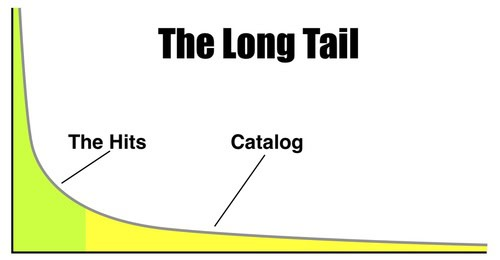

In [ ]:
#pip install gensim

# Task A.
- Extract 8-10k reviews. However, many reviews may not have any text and will therefore be discarded. So be prepared to scrape a lot of pages of reviews per beer. Beeradvocate.com requires you to log in to read reviews beyond the first page.

# Latest Page Scraper

- Started off scraping the album reviews from [rateyourmusic.com/latest](http://rateyourmusic.com/latest).
- The web scraper scrolled through the most recent user reviews for any given album and the pulled all the albums name, artist name, user review and user rating.
- This gave us ~2,000 reviews fairly quickly. However, this section of the website limits us to only 2,000 reviews, so we had to go deeper into the website to get the full 8,000.


### Details
- This scraper Opened Chrome with **undetected_chromedriver.**
- Detected if Cloudflare showed a “human check”, paused if so to allow to solve.
- Browse through the **Latest Reviews** pages, collect the **album, artist, review text and user rating.**
- Save everything to CSV.

In [ ]:
# # Imports and Setup
# import time, random, re
# import pandas as pd
# from bs4 import BeautifulSoup
# from urllib.parse import urljoin
# import undetected_chromedriver as uc
# from selenium.webdriver.common.by import By

# # Configuration
# BASE = "https://rateyourmusic.com"           # Set base website as the root
# LATEST_URL = f"{BASE}/latest"                # The page that we are actually scraping
# OUT_FILE = "rym_latest_reviews_shared.csv"   # CSV we are saving to
# PAGES_TO_SCRAPE = 50
# HUMAN_WAIT_SECS = 420                        # Time to wait to solve the human verifcation check
# DELAY = (1.0, 2.0)                           # Delay between pages to avoid clouflare detection


# # Used to find things like "4.5 stars" in HTML
# STAR_RE = re.compile(r"([\d.]+)\s*star", re.I)


# # Driver
# def make_driver():
#     """ Launches Chrome with special option to hide signals that usually give away selenium """
#     opts = uc.ChromeOptions()
#     opts.add_argument("--disable-blink-features=AutomationControlled")
#     return uc.Chrome(options=opts)

# # Cloudflare Detection Handling
# def is_human_check(driver):
#     """ Looks at the Page and nnotices if it finds or has hit any verification alert """
#     src = driver.page_source.lower()
#     cues = ["confirm you are human","verify you are human","i'm not a robot","cf-challenge"]
#     if any(c in src for c in cues):
#         return True
#     try:
#         return bool(driver.find_elements(By.CSS_SELECTOR, "iframe[src*='recaptcha'], #challenge-stage"))
#     except:
#         return False

# def wait_for_clear(driver, timeout=HUMAN_WAIT_SECS):
#     """ If the human check appears, program will wait while we solve in Chrome. Checks every 2 seconds if challenege is gone """
#     start = time.time()
#     while time.time() - start < timeout:
#         if not is_human_check(driver):
#             return True
#         time.sleep(2)
#     return False

# def load_page(driver, url):
#     """ Opens a URL page in Chrome and if Cloudflare shows up, it pauses and allows us to solve.
#         Then returns the page after parting with BS """
#     driver.get(url)
#     if is_human_check(driver):
#         if not wait_for_clear(driver):
#             return None
#     time.sleep(1)
#     return BeautifulSoup(driver.page_source, "lxml")

# # Extracting Data
# def extract_review(block):
#     """ Pulling Review Text and Ratings (looking for stars) """
#     text = " ".join(el.get_text(" ", strip=True) for el in block.select("span.rendered_text, p")).strip()
#     rating = ""
#     tag = block.select_one("[aria-label*='star'], [title*='star']")
#     if tag:
#         m = STAR_RE.search(tag.get("aria-label","")+tag.get("title",""))
#         if m: rating = m.group(1)
#     return text, rating

# def extract_album_artist(block):
#     """ Pulls the album name and the artist name """
#     album, artist = "", ""
#     rel = block.select_one("a[href*='/release/']")
#     if rel: album = rel.get_text(" ", strip=True)
#     art = block.select_one("a[href*='/artist/']")
#     if art: artist = art.get_text(" ", strip=True)
#     return album, artist

# # Main Scraper Loop
# def run():
#     """ The scraper:
#         - Loops through the pages of the Latest Reviews
#         - Finds all review blocks and pulls the album, artist, review text and rating.
#         - Appends them to a list
#         - Saves the list to a CSV
#     """
#     driver = make_driver()
#     all_reviews = []
#     try:
#         for page in range(1, PAGES_TO_SCRAPE + 1):
#             soup = load_page(driver, f"{LATEST_URL}?page={page}")
#             if not soup: break
#             blocks = soup.select("div.review, div.review_box, table.mbgen")
#             if not blocks: break
#             for block in blocks:
#                 album, artist = extract_album_artist(block)
#                 text, rating = extract_review(block)
#                 if text or rating:
#                     all_reviews.append({
#                         "album": album,
#                         "artist": artist,
#                         "review_text": text,
#                         "user_rating": rating
#                     })
#             pd.DataFrame(all_reviews).to_csv(OUT_FILE, index=False)
#             time.sleep(random.uniform(*DELAY))
#     finally:
#         driver.quit()

# if __name__ == "__main__":
#     run()


# Charts Scraper
- In search of more album reviews, we switched to seeding albums from (Top albums of all time, 2024 and 2025 top albums)
- For each album found in those charts, the scraper went into its reviews page and collected reviews for each album, allowing us to get a larger variety of genres and artists and pull the require data amount.


### Details

**Album Collection**
- Opens the chart pages (all time, 2024 and 2025) and collects links to album pages


**Cloudflare Handling**
- If a "confirm you are human" page appears, the script pauses and allows us to solve the challenege in Chrome
- Once solve, the program continues automatically.

**Scraping Reviews**
- Opens the album's review page and collects up to set "Reviews Per Album"
- It scrapes the album name, the artist name, the review text and the user rating.

In [ ]:
# # Imports
# import time, random, re
# import pandas as pd
# from bs4 import BeautifulSoup
# from urllib.parse import urljoin
# import undetected_chromedriver as uc
# from selenium.webdriver.common.by import By


# # Config
# BASE = "https://rateyourmusic.com"
# CHARTS = [
#     f"{BASE}/charts/top/album/all-time",
#     f"{BASE}/charts/top/album/2025",
#     f"{BASE}/charts/top/album/2024"
# ]
# OUT_FILE = "rym_chart_reviews.csv"
# REVIEWS_PER_ALBUM = 8           # Amount of reviews per album
# PAGES_PER_CHART = 10            # Amount of chart pages to scan for album
# HUMAN_WAIT_SECS = 420
# DELAY = (1.0, 2.0)

# STAR_RE = re.compile(r"([\d.]+)\s*star", re.I)


# # Browser Setup
# def make_driver():
#     opts = uc.ChromeOptions()
#     opts.add_argument("--disable-blink-features=AutomationControlled")
#     return uc.Chrome(options=opts)


# # Cloudflare Handling
# def is_human_check(driver):
#     src = driver.page_source.lower()
#     cues = ["confirm you are human","verify you are human","i'm not a robot","cf-challenge"]
#     if any(c in src for c in cues):
#         return True
#     try:
#         return bool(driver.find_elements(By.CSS_SELECTOR, "iframe[src*='recaptcha'], #challenge-stage"))
#     except:
#         return False

# def wait_for_clear(driver, timeout=HUMAN_WAIT_SECS):
#     start = time.time()
#     while time.time() - start < timeout:
#         if not is_human_check(driver):
#             return True
#         time.sleep(2)
#     return False

# def load_page(driver, url):
#     driver.get(url)
#     if is_human_check(driver):
#         if not wait_for_clear(driver):
#             return None
#     time.sleep(1)
#     return BeautifulSoup(driver.page_source, "lxml")


# # Extracting Data
# def extract_album_artist(soup):
#     title = soup.select_one("meta[property='og:title']")
#     if title and " - " in title["content"]:
#         artist, album = [p.strip() for p in title["content"].split(" - ", 1)]
#         return album, artist
#     return "", ""

# def extract_review(block):
#     text = " ".join(el.get_text(" ", strip=True) for el in block.select("span.rendered_text, p")).strip()
#     rating = ""
#     tag = block.select_one("[aria-label*='star'], [title*='star']")
#     if tag:
#         m = STAR_RE.search(tag.get("aria-label","")+tag.get("title",""))
#         if m: rating = m.group(1)
#     return text, rating


# # Scraping
# def collect_album_links(driver):
#     """Collect album URLs from the charts pages."""
#     albums = set()
#     for chart in CHARTS:
#         for p in range(1, PAGES_PER_CHART+1):
#             url = chart if p == 1 else f"{chart}?page={p}"
#             soup = load_page(driver, url)
#             if not soup: continue
#             for a in soup.select("a[href*='/release/']"):
#                 href = a.get("href") or ""
#                 if "/release/" in href:
#                     albums.add(urljoin(BASE, href))
#             time.sleep(0.5)
#     return sorted(albums)

# def scrape_album(driver, url):
#     """Scrape reviews from a single album (up to REVIEWS_PER_ALBUM)."""
#     rows = []
#     soup = load_page(driver, url + "/reviews/")
#     if not soup: return rows

#     album, artist = extract_album_artist(soup)

#     while len(rows) < REVIEWS_PER_ALBUM and soup:
#         blocks = soup.select("div.review, div.review_box, table.mbgen")
#         if not blocks: break
#         for block in blocks:
#             text, rating = extract_review(block)
#             if text or rating:
#                 rows.append({
#                     "album": album,
#                     "artist": artist,
#                     "review_text": text,
#                     "user_rating": rating
#                 })
#             if len(rows) >= REVIEWS_PER_ALBUM:
#                 break
#         nxt = soup.select_one("a[rel='next']")
#         if nxt:
#             soup = load_page(driver, urljoin(BASE, nxt.get("href")))
#         else:
#             break
#         time.sleep(random.uniform(*DELAY))
#     return rows


# # Main Run
# def run():
#     driver = make_driver()
#     all_reviews = []
#     try:
#         albums = collect_album_links(driver)
#         for url in albums:
#             all_reviews.extend(scrape_album(driver, url))
#             pd.DataFrame(all_reviews).to_csv(OUT_FILE, index=False)
#             time.sleep(random.uniform(*DELAY))
#     finally:
#         driver.quit()

# if __name__ == "__main__":
#     run()

## Installing Libraries

In [ ]:
!pip install --upgrade "pip<25" "setuptools<71" wheel
!pip install "numpy==1.26.4" "scipy==1.13.1" "gensim==4.3.3"
#pip install argostranslate==1.9.6
#pip install langdetect


In [ ]:
# Ensure correct numpy and gensim versions are installed
!pip uninstall -y numpy gensim
!pip install numpy==1.26.4 gensim==4.3.3

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which i

In [ ]:
import numpy as np, gensim, pandas as pd
from gensim.models import Word2Vec

## Importing dataset

In [ ]:
#manual importing csv file into colab environment
df = pd.read_csv('rym_reviews_FINAL_ASSIGN_fixed.csv')

In [ ]:
df

,album_name,artist,album_review,user_rating
0,L'impôt du sang,Conifère,"clever, ambitious, and absolutely pulling it o...",4.5
1,L'impôt du sang,Conifère,An earworm-y set of melodic metal tracks that ...,4.0
2,L'impôt du sang,Conifère,With a really nice production and mixing for a...,3.5
3,Low,David Bowie,"My first (conscious) acquaintance with ""Low"" w...",5.0
4,Low,David Bowie,Now this is an album that makes more sense on ...,5.0
...,...,...,...,...
8309,Bocanada,Gustavo Cerati,El inicio de mi obsesión con la música Qué se ...,5.0
8310,Good vs Evil,Forgiato Blow,"We're not planting seeds of division here, we'...",0.5
8311,The Passionate Ones,Nourished by Time,marcus brown toes the line between nostalgia a...,4.5
8312,C'est Nos Vis,Chaufau,Des suisses bien inspirés On ressent plein d’i...,3.5


In [ ]:
#metadata on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   album_name    8314 non-null   object 
 1   artist        8314 non-null   object 
 2   album_review  8313 non-null   object 
 3   user_rating   8115 non-null   float64
dtypes: float64(1), object(3)
memory usage: 259.9+ KB


## Discarding null user_rating rows

In [ ]:
#checking for any null values on user_rating
df['user_rating'].isna().sum()

199

As we can see, there are 199 entries where the user rating is null.

Let's drop those rows. This should give us a dataframe with 8115 rows with numerical user ratings.

In [ ]:
#we need a user_rating for every review for later down the line, so dropping rows where users skipped this
df = df.dropna(subset=['user_rating'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8115 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   album_name    8115 non-null   object 
 1   artist        8115 non-null   object 
 2   album_review  8114 non-null   object 
 3   user_rating   8115 non-null   float64
dtypes: float64(1), object(3)
memory usage: 317.0+ KB


In [ ]:
#sanity check
df['user_rating'].isna().sum()

0

## Discarding null album_review rows

In [ ]:
df['album_review'].isna().sum()

1

In [ ]:
df = df.dropna(subset=['album_review'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8114 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   album_name    8114 non-null   object 
 1   artist        8114 non-null   object 
 2   album_review  8114 non-null   object 
 3   user_rating   8114 non-null   float64
dtypes: float64(1), object(3)
memory usage: 317.0+ KB


## Cleaning strings

Next, let's remove the punctuation and make everything lowercase to make things easier to process for word analysis.

In [ ]:
df['album_review'] = df['album_review'].str.lower().str.replace('[^\w\s]','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2785993919.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['album_review'] = df['album_review'].str.lower().str.replace('[^\w\s]','', regex=True)


In [ ]:
df['album_review']

,album_review
0,clever ambitious and absolutely pulling it off
1,an earwormy set of melodic metal tracks that i...
2,with a really nice production and mixing for a...
3,my first conscious acquaintance with low was w...
4,now this is an album that makes more sense on ...
...,...
8309,el inicio de mi obsesión con la música qué se ...
8310,were not planting seeds of division here were ...
8311,marcus brown toes the line between nostalgia a...
8312,des suisses bien inspirés on ressent plein din...


## Translating album_review If Not English

## **DO NOT RUN**, Just import the file albums_translated_en.csv instead

In [ ]:
#!pip install argostranslate==1.9.6
#!pip install langdetect


In [ ]:
# # --- Argos Translate: install language pairs, build translators, and parallel-translate to English ---
#
# # If on Python 3.12 and wheels fail, consider pre-install: pip install "argostranslate==1.9.6"
# import os
# import pandas as pd
# import argostranslate.package as argpkg
# import argostranslate.translate as argtr
# from functools import lru_cache
# from langdetect import detect, DetectorFactory
# from tqdm.auto import tqdm
# import multiprocessing as mp
#
# # 0) Settings
# DetectorFactory.seed = 42
# COMMON_SRC_LANGS = ["es","fr","pt","de","it"]
#
# # 1) Update package index and install common -> en models (run once per kernel)
# argpkg.update_package_index()
# _available = argpkg.get_available_packages()
#
# def install_pair(from_code, to_code):
#     pkg = next((p for p in _available if p.from_code == from_code and p.to_code == to_code), None)
#     if pkg is None:
#         return False
#     path = pkg.download()            # pathlib.Path to .argosmodel
#     argpkg.install_from_path(path)
#     return True
#
# for src in COMMON_SRC_LANGS:
#     try:
#         ok = install_pair(src, "en")
#         print(f"Installed {src}->en:", ok)
#     except Exception as e:
#         print(f"Failed {src}->en:", e)
#
# # 2) Build translators map src_code -> translator to English
# def build_translators():
#     langs = argtr.get_installed_languages()
#     code2 = {l.code: l for l in langs}
#     trans = {}
#     if "en" not in code2:
#         return trans
#     en = code2["en"]
#     for code, lang in code2.items():
#         if code == "en":
#             continue
#         try:
#             tr = lang.get_translation(en)  # Translator object
#             trans[code] = tr
#         except Exception:
#             pass
#     return trans
#
# TRANSLATORS = build_translators()
#
# # 3) Language detection and normalization
# def normalize_lang(code):
#     if not code:
#         return "unk"
#     return code.lower().split("-")[0]  # es-419 -> es
#
# def detect_lang(text):
#     try:
#         return normalize_lang(detect(text))
#     except Exception:
#         return "unk"
#
# # 4) Rowwise translation helper (non-parallel fallback and small-sample tests)
# @lru_cache(maxsize=100000)
# def translate_to_en(text, lang_code):
#     if not text or lang_code in ("unk","en"):
#         return text
#     tr = TRANSLATORS.get(lang_code)
#     if tr is None:
#         return text  # fallback: unchanged if no installed model
#     try:
#         return tr.translate(text)
#     except Exception:
#         return text
#
# # 5) Prepare dataframe
# df_translate = df.copy()
# df_translate["lang"] = df_translate["album_review"].map(detect_lang)
# df_translate["album_review_orig"] = df_translate["album_review"]
#
# # Prepare tasks for non-English rows
# mask_non_en = df_translate["lang"] != "en"
# subset = df_translate.loc[mask_non_en, ["album_review","lang"]].reset_index()
# tasks = list(zip(subset["index"].tolist(), subset["album_review"].tolist(), subset["lang"].tolist()))
#
# # 6) Translate with tqdm (single-process, stable)
# results = []
# if len(tasks):
#     for idx, text, lang in tqdm(tasks, total=len(tasks)):
#         out = translate_to_en(text, lang)
#         results.append((idx, out))
#     out_map = dict(results)
#     df_translate["album_review_en"] = df_translate["album_review"]
#     df_translate.loc[mask_non_en, "album_review_en"] = df_translate.loc[mask_non_en].index.map(out_map)
# else:
#     df_translate["album_review_en"] = df_translate["album_review"]
#
# # 7) Audit
# non_en = df_translate[df_translate["lang"]!="en"]
# changed_share = (non_en["album_review_en"] != non_en["album_review_orig"]).mean() if len(non_en) else 0.0
# print("Non-English rows:", len(non_en), "| Share changed:", round(float(changed_share), 3))
#
# # 8) Downstream pivot
# df_en = df_translate.copy()
# TEXT_COL = "album_review_en"

In [ ]:
# # After step 7 (Audit), identify languages that did not change
# unchanged = df_translate[(df_translate["lang"]!="en") &
#                          (df_translate["album_review_en"] == df_translate["album_review_orig"])]
#
# missing_langs = sorted(unchanged["lang"].dropna().unique().tolist())
# print("Languages with no translation change:", missing_langs)
#
# # Count occurrences of each language with no translation change
# lang_counts = unchanged["lang"].value_counts()
# print("\nCounts of languages with no translation change:")
# print(lang_counts)

In [ ]:
#df_translate.to_csv('album_review_en.csv', index=False)

## Task A requirements df

- Treating Albums as products
- Data has 8k+ reviews
- 3 required columns are present (prod name, prod review, prod rating)

In [ ]:
df_en = pd.read_csv('album_review_en.csv')
df_en

,album_name,artist,album_review,user_rating,lang,album_review_orig,album_review_en
0,L'impôt du sang,Conifère,clever ambitious and absolutely pulling it off,4.5,en,clever ambitious and absolutely pulling it off,clever ambitious and absolutely pulling it off
1,L'impôt du sang,Conifère,an earwormy set of melodic metal tracks that i...,4.0,en,an earwormy set of melodic metal tracks that i...,an earwormy set of melodic metal tracks that i...
2,L'impôt du sang,Conifère,with a really nice production and mixing for a...,3.5,en,with a really nice production and mixing for a...,with a really nice production and mixing for a...
3,Low,David Bowie,my first conscious acquaintance with low was w...,5.0,en,my first conscious acquaintance with low was w...,my first conscious acquaintance with low was w...
4,Low,David Bowie,now this is an album that makes more sense on ...,5.0,en,now this is an album that makes more sense on ...,now this is an album that makes more sense on ...
...,...,...,...,...,...,...,...
8109,Bocanada,Gustavo Cerati,el inicio de mi obsesión con la música qué se ...,5.0,es,el inicio de mi obsesión con la música qué se ...,The beginning of my obsession with the music w...
8110,Good vs Evil,Forgiato Blow,were not planting seeds of division here were ...,0.5,en,were not planting seeds of division here were ...,were not planting seeds of division here were ...
8111,The Passionate Ones,Nourished by Time,marcus brown toes the line between nostalgia a...,4.5,en,marcus brown toes the line between nostalgia a...,marcus brown toes the line between nostalgia a...
8112,C'est Nos Vis,Chaufau,des suisses bien inspirés on ressent plein din...,3.5,fr,des suisses bien inspirés on ressent plein din...,Well-inspired Swiss people feel a lot of influ...


In [ ]:
#copy df_en translation into df
df['album_review'] = df_en['album_review_en']

In [ ]:
df3 = (df[['album_name','album_review','user_rating']]
       .rename(columns={'album_name':'product_name',
                        'album_review':'product_review',
                        'user_rating':'user_rating'}))
df3.to_csv('reviews_3cols.csv', index=False)
df3.head(3)


,product_name,product_review,user_rating
0,L'impôt du sang,clever ambitious and absolutely pulling it off,4.5
1,L'impôt du sang,an earwormy set of melodic metal tracks that i...,4.0
2,L'impôt du sang,with a really nice production and mixing for a...,3.5


In [ ]:
num_unique_albums = df3['product_name'].nunique()
print(f"Number of unique albums: {num_unique_albums}")

Number of unique albums: 2453


In [ ]:
# unique count on full dataset
n_unique_full = df['album_name'].nunique()
print('Unique albums (full):', n_unique_full)

# choose ~250 albums with most reviews (fix seed only if tie-breaking via random)
counts = df.groupby('album_name').size().rename('n_reviews').reset_index()
top_albums = counts.sort_values('n_reviews', ascending=False).head(250)['album_name']
df_250 = df[df['album_name'].isin(top_albums)].copy()

# verify counts and basic sanity
print('Unique albums (subset):', df_250['album_name'].nunique())
print('Total reviews (subset):', len(df_250))
print(df_250.groupby('album_name').size().describe())


Unique albums (full): 2453
Unique albums (subset): 250
Total reviews (subset): 2326
count    250.000000
mean       9.304000
std        2.982476
min        8.000000
25%        8.000000
50%        8.000000
75%       10.000000
max       48.000000
dtype: float64


# Task B.
- Assume that a customer, who will be using this recommender system, has specified 3 attributes in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes from the actual data like you did for the first assignment)

- Assume that a customer has specified 3 attributes of the product as being important to him or her.
Recommend 3 beers using a bag-of-words model with cosine similarity and sentiment analysis. Explain your method in detail (in words!)

### Attribute Selection

**1.Frequency Counts**

Started with traditional word frequency with no grouping to select attributes, but they were not specific enough.
    
**2.Defined Attribute Groups**
   - **Writing** (e.g., content, lyrics, storytelling, themes)
   - **Mood** (e.g., space,atmosphere, cinematic, lush)
   - **Instrumentation** (e.g., guitar,riffs, solo, shredding)


   Each group contained relevant keywords representing attributes that would
   be realistic to a users querey. These subfacets act as “search terms”
   we want to detect in reviews.

   **3.Selected Subfacet Attributes**
   
Mapped the attributes to words in the data to find relevant frequncies and hand-picked from those.

**4.Performed Lift Analysis**

Ensured subfacets are not too narrow, attributes will be mentioned together, and are relevant.

## General Frequency Attributes

In [ ]:
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction import text as sktext

# Base data
df_attr = df.copy()
df_attr = df_attr.dropna(subset=['album_review'])
df_attr['album_review'] = df_attr['album_review'].astype(str)

# Base English stopwords from scikit-learn
base_en = set(sktext.ENGLISH_STOP_WORDS)

# Domain + reviewer generic stops
domain_stops = {
    'album','albums','artist','artists','track','tracks','song','songs','record','records',
    'lp','ep','side','production','mix','mixing','band','release','released','version',
    'deluxe','remaster','remastered','music','musical','disc','cd','vinyl'
}
reviewer_fillers = {
    'like','really','good','bad','great','nice','cool','awesome','love','hate','think',
    'about','way','well','first','time','still','again','ever','always','pretty','quite',
    'rather','literally','definitely','maybe','probably','honestly','basically','actually',
    'just','also','though','however','anyway'
}
aux_modals = {'do','does','did','have','has','had','can','could','may','might','will','would','shall','should','im','amp'}
non_en_func = {'que','de','la','le','les','el','los','las','y','en','un','una','es','por','para','con','mais','plus','menos','si'}

# also need to deal with contractions
_contr = [
    (r"n['’']t\b", " not"),
    (r"['’']re\b", " are"),
    (r"['’']s\b", " is"),
    (r"['’']m\b", " am"),
    (r"['’']ll\b", " will"),
    (r"['’']d\b", " would"),
    (r"['’']ve\b", " have"),
    (r"\bcant\b", "can not"), (r"\bwon['’]?t\b", "will not"),
]

stop_set = base_en | domain_stops | reviewer_fillers | aux_modals | non_en_func | {'dont', 'cant', 'wont', 'theres'}

def normalize_text(text: str) -> str:
    t = text.lower()
    for pat, rep in _contr:
        t = re.sub(pat, rep, t)
    t = re.sub(r"[^a-z\s]", " ", t)  # keep letters/spaces
    t = re.sub(r"\s+", " ", t).strip()
    return t

def tokenize_unigrams(text: str):
    t = normalize_text(text)
    toks = t.split()
    return [w for w in toks if len(w) >= 3 and w.isalpha() and w not in stop_set]

# Count unique unigrams per review
counter = Counter()
for txt in df_attr['album_review']:
    counter.update(set(tokenize_unigrams(txt)))

df_attr = df_attr.dropna(subset=['album_review'])
df_attr['album_review'] = df_attr['album_review'].astype(str)

# Small post-prune of remaining discourse-y terms if present
post_prune = {'thing','stuff','people','music'}  # conservative
for p in post_prune:
    counter.pop(p, None)

top200 = counter.most_common(200)
top200_df = pd.DataFrame(top200, columns=['attribute','count'])
print("Top 200 unigram attributes (cleaned):")
print(top200_df.to_string(index=False))

Top 200 unigram attributes (cleaned):
   attribute  count
       sound   2185
        best   1849
        feel   1645
      listen   1615
      sounds   1494
    reviewed   1441
      vocals   1391
         lot   1353
      little   1286
         bit   1280
        make   1262
         say   1239
         new   1176
        know   1162
       thats   1146
       feels   1144
         ive   1143
       makes   1128
      better   1124
       heard   1122
      doesnt   1120
        rock   1119
        work   1118
      lyrics   1022
       years   1015
   listening    998
      guitar    987
         end    977
        long    971
    favorite    950
       going    940
        kind    926
       metal    870
        life    863
        isnt    859
        come    850
     overall    847
       point    832
      things    830
       right    822
         pop    801
   beautiful    800
       didnt    794
        hear    791
  especially    789
        hard    783
 interesting    772
  

## New features?

We originally landed on the attributes rock, metal, and guitar which seemed generic. To make our attributes more orthogonal (independent, whereas rock and metal are basically the same thing and redundant, creating really small angles with great similarity), we can break up album features into more broad categories. Choosing rock and metal constrict us to a specific cluster and cut up within that cluster.

-  Structure/presence: **vocals** with 1391 mentions
-  Instrumentation: **guitar** with 987 mentions
-  Texture/mood: **atmosphere** with 515 mentions

Instrumentation, texture/mood, and structure broadly categorize albums of all types.

It depends totally on how we structure our end-user's query. We could give our end-user a choice out of even more broad categories, or we can have the end-user make up their own exact genres and favorites to consider.

## Attribute lexicons

Remember when we replaced car models with their corresponding brands? Trying to accomplish that here.

In [ ]:
# === Facet mapping for album reviews ===
import re
import pandas as pd
from sklearn.feature_extraction import text as sktext

# Reuse/align with your existing pipeline
base_en = set(sktext.ENGLISH_STOP_WORDS)
domain_stops = {
    'album','albums','artist','artists','track','tracks','song','songs','record','records',
    'lp','ep','side','production','mix','mixing','band','release','released','version',
    'deluxe','remaster','remastered','music','musical','disc','cd','vinyl'
}
reviewer_fillers = {
    'like','really','good','bad','great','nice','cool','awesome','love','hate','think',
    'about','way','well','first','time','still','again','ever','always','pretty','quite',
    'rather','literally','definitely','maybe','probably','honestly','basically','actually',
    'just','also','though','however','anyway'
}
aux_modals = {'do','does','did','have','has','had','can','could','may','might','will','would','shall','should','im','amp'}
non_en_func = {'que','de','la','le','les','el','los','las','y','en','un','una','es','por','para','con','mais','plus','menos','si'}

_contr = [
    (r"n['’']t\b", " not"),
    (r"['’']re\b", " are"),
    (r"['’']s\b", " is"),
    (r"['’']m\b", " am"),
    (r"['’']ll\b", " will"),
    (r"['’']d\b", " would"),
    (r"['’']ve\b", " have"),
    (r"\bcant\b", "can not"), (r"\bwon['’]?t\b", "will not"),
]
stop_set = base_en | domain_stops | reviewer_fillers | aux_modals | non_en_func | {'dont','cant','wont','theres'}

def normalize_text(text: str) -> str:
    t = text.lower()
    for pat, rep in _contr:
        t = re.sub(pat, rep, t)
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

# Facet lexicon (expand as needed; seeded from your top-200 list)
facet_lex = {
    'Instrumentation': {
        'guitar','guitars','bass','drums','beats','piano','riffs','solo','sax','saxophone','synth','synths'
    },
    'Vocals': {
        'vocals','vocal','voice','singing','falsetto','growls','harsh','choir','choral','screams','spoken','rap'
    },
    'Mood': {
        'atmosphere','dark','emotional','beautiful','heavy','energetic','melancholic','dreamy','aggressive','uplifting','cinematic'
    },
    'Production': {
        'live','lofi','lo-fi','raw','polished','warm','analog','digital','reverb','reverbed','compressed','dynamic','mix','mixing'
    },
    'Structure': {
        'instrumental','melodic','interlude','suite','long','short','verses','chorus','throughcomposed','through-composed'
    },
    'Genre': {
        'rock','metal','pop','jazz','soul'
    },
    'Writing': {
        'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'
    }
}

# === Add hierarchical subfacets without changing macros ===

hier_lex = {
    'Instrumentation': {
        'Guitars': {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'},
        'Rhythm': {'drums','beats','drum','drummer','percussion','polyrhythmic'},
        'Keys': {'piano','organ','keyboard','keys'},
        'Synths': {'synth','synths','analog','digital','modular'},
        'LowEnd': {'bass','sub','lowend','low-end'}
    },
    'Vocals': {
        'Presence': {'instrumental','vocal','vocals','voice','singing'},
        'Style': {'falsetto','growls','harsh','screams','spoken','rap','choir','choral','duet'}
    },
    'Mood': {
        'Valence': {'beautiful','melancholic','dreamy','uplifting','ominous','bittersweet'},
        'Arousal': {'energetic','aggressive','tranquil','intense','heavy'},
        'Space': {'atmosphere','atmospheric','dark','cinematic','spacious','lush','dry'}
    },
    'Production': {
        'Fidelity': {'lofi','lo-fi','raw','polished','crisp','warm'},
        'Dynamics': {'compressed','dynamic','loudness'},
        'Environment': {'live','studio','room','reverb','reverbed','dry'}
    },
    'Structure': {
        'Form': {'verse','chorus','throughcomposed','through-composed','suite','interlude'},
        'LengthDensity': {'long','short','minimalist','maximalist','layered','dense','jam'}
    },
    'Genre': {
        'RockMetal': {'rock','metal','black'},
        'PopSoul': {'pop','soul'},
        'Jazz': {'jazz'},
        'HipHop': {'rap'}
    },
    'Writing': {
        'Content': {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
    }
}

# Build token->subfacet
term2sub = {t: sub for macro, subdict in hier_lex.items() for sub, terms in subdict.items() for t in terms}

def map_reviews_to_facets_hier(df_attr):
    facet_tags = []
    facet_text = []
    sub_tags = []
    sub_text = []
    for txt in df_attr['album_review'].astype(str):
        t = normalize_text(txt)
        toks = [w for w in t.split() if len(w) >= 3 and w.isalpha() and w not in stop_set]
        # Macros (existing)
        macros = sorted(set(term2facet[w] for w in toks if w in term2facet))
        # Subfacets (new)
        subs = sorted(set(term2sub[w] for w in toks if w in term2sub))
        facet_tags.append(macros)
        facet_text.append(' '.join(macros))
        sub_tags.append(subs)
        sub_text.append(' '.join(subs))
    out = df_attr.copy()
    out['facet_tags'] = facet_tags
    out['facet_text'] = facet_text
    out['facet_subs'] = sub_tags
    out['facet_subtext'] = sub_text
    return out

# Example usage (keeps your original function available too):
# df_attr_mapped = map_reviews_to_facets_hier(df_attr)
# df_attr_mapped[['album_review','facet_text','facet_subtext']].head()

# Build lookup
term2facet = {t: facet for facet, terms in facet_lex.items() for t in terms}

def tokens_to_facets(tokens, dedupe=True):
    mapped = [term2facet[tok] for tok in tokens if tok in term2facet]
    if dedupe:
        mapped = sorted(set(mapped))
    return mapped

def map_reviews_to_facets(df_attr):
    tags_col = []
    text_col = []
    for txt in df_attr['album_review'].astype(str):
        t = normalize_text(txt)
        toks = [w for w in t.split() if len(w) >= 3 and w.isalpha() and w not in stop_set]
        tags = tokens_to_facets(toks, dedupe=True)
        tags_col.append(tags)
        text_col.append(' '.join(tags))
    out = df_attr.copy()
    out['facet_tags'] = tags_col
    out['facet_text'] = text_col
    return out

# Example usage:
#df_attr_mapped = map_reviews_to_facets(df_attr)
#df_attr_mapped[['album_review','facet_tags','facet_text']].head()


In [ ]:
from collections import Counter
import pandas as pd

# If not already mapped:
df_attr_mapped = map_reviews_to_facets_hier(df_attr)

# Macro facet doc frequency (count each facet at most once per review)
macro_doc = Counter()
for macs in df_attr_mapped['facet_tags']:
    macro_doc.update(set(macs))
macro_df = pd.DataFrame(sorted(macro_doc.items(), key=lambda x: -x[1]), columns=['facet','doc_count'])

# Subfacet doc frequency (count each subfacet at most once per review)
sub_doc = Counter()
for subs in df_attr_mapped['facet_subs']:
    sub_doc.update(set(subs))
sub_df = pd.DataFrame(sorted(sub_doc.items(), key=lambda x: -x[1]), columns=['subfacet','doc_count'])

print("--Macro Facets--")
display(macro_df)
print("--Micro SubFacets--")
display(sub_df)


--Macro Facets--


,facet,doc_count
0,Instrumentation,2835
1,Genre,2810
2,Vocals,2662
3,Mood,2509
4,Structure,2111
5,Writing,1818
6,Production,1348


--Micro SubFacets--


,subfacet,doc_count
0,Presence,2488
1,RockMetal,2091
2,Content,1818
3,Guitars,1811
4,LengthDensity,1519
5,Rhythm,1284
6,Space,1249
7,Valence,1129
8,PopSoul,1102
9,Environment,1052


In [ ]:
from collections import Counter
import pandas as pd

# Requires: hier_lex, map_reviews_to_facets_hier, df_attr

# Build subfacet -> macro lookup
sub2macro = {sub: macro for macro, subdict in hier_lex.items() for sub in subdict.keys()}

# Map reviews if not already
df_attr_mapped = map_reviews_to_facets_hier(df_attr)

# Compute subfacet document frequencies (1 per review)
sub_doc = Counter()
for subs in df_attr_mapped['facet_subs']:
    sub_doc.update(set(subs))

# Assemble DataFrame with macro + subfacet + counts
rows = []
for subfacet, count in sub_doc.items():
    rows.append((sub2macro.get(subfacet, 'Unknown'), subfacet, count))

sub_with_macro_df = pd.DataFrame(rows, columns=['macro','subfacet','doc_count']) \
                      .sort_values(['macro','doc_count'], ascending=[True, False])

display(sub_with_macro_df)

,macro,subfacet,doc_count
1,Genre,RockMetal,2091
4,Genre,PopSoul,1102
12,Genre,Jazz,376
19,Genre,HipHop,342
9,Instrumentation,Guitars,1811
5,Instrumentation,Rhythm,1284
14,Instrumentation,LowEnd,557
11,Instrumentation,Keys,516
16,Instrumentation,Synths,477
8,Mood,Space,1249


### 3 Attributes

**Writing: Content**

**Mood: Spacy**

**Instrument: Guitar**

## Lift Analysis

In [ ]:
# Aggregate reviews and ratings by album and artist
agg = (df.groupby(['album_name','artist'])
         .agg(doc=('album_review', lambda x: " ".join(map(str, x))),
              n_reviews=('album_review','size'),
              avg_rating=('user_rating','mean'))
         .reset_index())

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

# 1) Aggregate album docs (already have agg with 'doc')
# agg = df.groupby(['album_name','artist']).agg(doc=('album_review', lambda x: " ".join(map(str, x)))).reset_index()

# 2) Tokenize per album doc
doc_tokens = [set(tokenize_unigrams(t)) for t in agg['doc'].astype(str)]

# 3) Build vocabulary freq on album docs and pick candidates
vocab_freq = Counter()
for s in doc_tokens:
    vocab_freq.update(s)
cand_terms = [w for w,_ in vocab_freq.most_common(200)]

# 4) Presence and marginals
presence = {w: np.array([w in s for s in doc_tokens], dtype=bool) for w in cand_terms}
P = {w: presence[w].mean() for w in cand_terms}

def pair_lift(a, b):
    if a not in presence or b not in presence:
        return np.nan, np.nan, np.nan, np.nan
    va, vb = presence[a], presence[b]
    pab = (va & vb).mean()
    pa, pb = P[a], P[b]
    denom = pa * pb
    L = np.nan if denom == 0 else (pab / denom)
    return pa, pb, pab, L

# 5) Analyze chosen token pairs (using representative tokens)
chosen_tokens = ['lyrics','atmosphere','guitar']  # Content, Space, Guitars (token heads)

rows = []
for i in range(len(chosen_tokens)):
    for j in range(i+1, len(chosen_tokens)):
        a, b = chosen_tokens[i], chosen_tokens[j]
        # If a/b not in cand_terms, compute presence on-the-fly
        if a not in presence:
            presence[a] = np.array([a in s for s in doc_tokens], bool); P[a] = presence[a].mean()
        if b not in presence:
            presence[b] = np.array([b in s for s in doc_tokens], bool); P[b] = presence[b].mean()
        pa, pb, pab, L = pair_lift(a, b)
        rows.append((a, b, pa, pb, pab, L))

token_lift_df = pd.DataFrame(rows, columns=['term_a','term_b','P(a)','P(b)','P(a&b)','Lift']).round(4)
display(token_lift_df)


,term_a,term_b,P(a),P(b),P(a&b),Lift
0,lyrics,atmosphere,0.3059,0.1740,0.0836,1.5698
1,lyrics,guitar,0.3059,0.2901,0.1424,1.6049
2,atmosphere,guitar,0.1740,0.2901,0.0856,1.6956


In [ ]:
# Define subfacet lexicons consistent with your mapping
subfacet_lex = {
    'Content': {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'},
    'Space': {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'},
    'Guitars': {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}
}

# Build subfacet presence over album docs: present if any term from the subfacet appears
sub_presence = {}
sub_P = {}
for sub, terms in subfacet_lex.items():
    mask = np.array([any((t in s) for t in terms) for s in doc_tokens], dtype=bool)
    sub_presence[sub] = mask
    sub_P[sub] = mask.mean()

def subfacet_pair_lift(a, b):
    va, vb = sub_presence[a], sub_presence[b]
    pab = (va & vb).mean()
    pa, pb = sub_P[a], sub_P[b]
    denom = pa * pb
    L = np.nan if denom == 0 else (pab / denom)
    return pa, pb, pab, L

chosen_subfacets = ['Content','Space','Guitars']
rows = []
for i in range(len(chosen_subfacets)):
    for j in range(i+1, len(chosen_subfacets)):
        a, b = chosen_subfacets[i], chosen_subfacets[j]
        pa, pb, pab, L = subfacet_pair_lift(a, b)
        rows.append((a, b, pa, pb, pab, L))

subfacet_lift_df = pd.DataFrame(rows, columns=['attr_a','attr_b','P(a)','P(b)','P(a&b)','Lift']).round(4)
display(subfacet_lift_df)


,attr_a,attr_b,P(a),P(b),P(a&b),Lift
0,Content,Space,0.4535,0.3586,0.2211,1.3593
1,Content,Guitars,0.4535,0.4544,0.2738,1.3288
2,Space,Guitars,0.3586,0.4544,0.2357,1.4465


The trio passes the professor’s criterion: every pair is co-mentioned above chance, yet no pair exhibits extreme collinearity that would reduce diversity.

Reporting both token and subfacet lifts strengthens the argument that replacing words with larger concepts remains coherent at the attribute level

## TF-IDF plus Sentiment analysis

**1.TF-IDF**
We transformed every album’s reviews into a TF-IDF vector. TF-IDF highlights distinctive words while reducing the influence of overly common words, allowing us to represent albums in a mathematical space suitable for similarity comparisons.

**2.Build a Weighted Query**
   From the attribute keywords, we built a weighted query. Keywords representing the chosen attributes were given higher weight so that the query emphasizes those aspects. This query acts like a “lens” focusing the recommendations on the desired attributes.
   
**3.Measure Cosine Similarity**
   We computed the raw **cosine similarity** between the weighted query vector and each album’s review vector.
   Cosine similarity quantifies how closely an album’s reviews match the attribute query and ranges from -1 to 1. Higher similarity scores indicate a closer match.

**4.Analyze Sentiment per Attribute**
We considered sentiment in addition to keyword matching. For each album review:
   - We split the review into sentences.
   - Calculated a raw sentiment score using VADER for each attribute group.
   - Applied strict gating rules so that sentiment is counted only if a sentence had meaningful attribute mentions (2+ hits, or 1+ hit with a "long" sentence).
   - We aggregated these scores into an overall sentiment per album.

**5.Blend Similarity and Sentiment**
   We combined the TF-IDF similarity score and sentiment score using a weighted approach (`score = alpha * simililarity + (1-alpha)`, where `alpha = 0.7`). This gave the **TF-IDF + sentiment score**.
   Similarity was weighted more heavily, but sentiment still influenced the final ranking.
   
**6.Rank Albums**
   We filtered albums to those with at least 3 reviews for reliability, then sorted them by the final score.
   This produced a ranked list of albums that best matched the user’s specified attributes and had positive sentiment in reviews.

**Outcome:**
This method produces recommendations that go beyond simple keyword matching by considering both **relevance** (raw cosine) and **tone** (raw VADER), which is important when recommending music albums.

In [ ]:
# =========================
# TF-IDF + Sentiment recommender (aligned to Content, Space, Guitars)
# =========================
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

# Assumes:
# - agg exists with columns: album_name, artist, doc, n_reviews, avg_rating
# - tokenize_unigrams(text) is defined and used consistently with lift tokenization
# - doc_tokens already built for lift; we will reuse agg['doc'] for TF-IDF and sentiment

# 1) Define subfacet lexicons to match lift
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {
    'Content': CONTENT_LEX,
    'Space':   SPACE_LEX,
    'Guitars': GUITAR_LEX
}
ALL_ATTR_TOKENS = set().union(*ATTR_LEX.values())

# 2) TF-IDF on album docs
def tfidf_vectorizer_unigram():
    return TfidfVectorizer(tokenizer=tokenize_unigrams, ngram_range=(1,1), min_df=5, max_df=0.7)

tfv_uni = tfidf_vectorizer_unigram()
X_uni = tfv_uni.fit_transform(agg['doc'])
vocab = set(tfv_uni.get_feature_names_out())

# 3) Build weighted query from subfacet tokens that survived pruning
weight_per_attr = 5
qtoks = []
for lex in [CONTENT_LEX, SPACE_LEX, GUITAR_LEX]:
    toks_in_vocab = [t for t in lex if t in vocab]
    if toks_in_vocab:
        for t in toks_in_vocab:
            qtoks.extend([t] * weight_per_attr)

if not qtoks:
    qtoks = list(ALL_ATTR_TOKENS & vocab)

query_text = " ".join(qtoks) if qtoks else " ".join(['lyrics','atmosphere','guitar'])
q = tfv_uni.transform([query_text])

sim = cosine_similarity(q, X_uni).ravel()
out_tfidf = agg[['album_name', 'artist', 'n_reviews', 'avg_rating']].copy()
out_tfidf['similarity_tfidf'] = sim  # Use raw cosine similarities

# 4) Per-attribute sentiment with stricter gating (median aggregation)
sia = SentimentIntensityAnalyzer()

def attr_sentiment_by_subfacet(text: str):
    sents = re.split(r'[.!?]', str(text))
    out = {}
    for name, lex in ATTR_LEX.items():
        vals = []
        for s in sents:
            toks = set(tokenize_unigrams(s))
            hits = toks & lex
            # Gate: >=2 hits, or 1 hit with sufficiently long sentence
            if len(hits) >= 2 or (hits and len(toks) >= 10):
                vals.append(sia.polarity_scores(s)['compound'])
        out[name] = float(np.median(vals)) if vals else 0.0
    return out

# Compute dicts and assign via DataFrame to avoid missing columns
sent_dicts = agg['doc'].apply(attr_sentiment_by_subfacet)

# Create columns with defaults, then assign in bulk
for k in ATTR_LEX.keys():
    agg[f'sent_{k.lower()}'] = 0.0

sent_df = pd.DataFrame(list(sent_dicts), index=agg.index)[list(ATTR_LEX.keys())]
sent_df.columns = [f'sent_{k.lower()}' for k in sent_df.columns]
agg.loc[:, sent_df.columns] = sent_df.values

# 5) Aggregate and robust-normalize sentiment
sent_cols = ['sent_content','sent_space','sent_guitars']
fs = agg[sent_cols].mean(axis=1).to_numpy()  # Use raw mean sentiment

# 6) Blend similarity and sentiment; rank albums
alpha = 0.7  # TF-IDF weight
out_bow = agg[['album_name','artist','n_reviews','avg_rating']].copy()
out_bow['similarity'] = sim  # raw cosine similarity from above
out_bow['feat_sent'] = fs    # raw mean sentiment from above
out_bow['tfidf + sent score'] = alpha*out_bow['similarity'] + (1-alpha)*out_bow['feat_sent']

rankable = out_bow[out_bow['n_reviews'] >= 3].sort_values('tfidf + sent score', ascending=False)

# 7) Inspect top 23 and top 3 with per-attribute sentiment
debug_cols = ['album_name','artist','n_reviews','avg_rating','similarity','feat_sent','tfidf + sent score']
display(rankable.head(23)[debug_cols])
display(rankable.head(3)[debug_cols])

# Optional: print diagnostics
print('Query tokens kept:', sorted(set(qtoks))[:40], '... total', len(set(qtoks)))
print('Sentiment coverage (fraction >0 per attr):',
      {c: float((agg[c] != 0).mean()) for c in sent_cols})


,album_name,artist,n_reviews,avg_rating,similarity,feat_sent,tfidf + sent score
2115,The Thief Next to Jesus,Ka,9,3.888889,0.081903,0.9999,0.357302
622,Dots and Loops,Stereolab,8,4.437500,0.077591,0.9999,0.354284
341,Bleeds,Wednesday,16,3.875000,0.073513,1.0000,0.351459
1988,The Comeup,smokedope2016,8,3.750000,0.069008,0.9999,0.348276
889,Goo,Sonic Youth,3,4.000000,0.068209,0.9999,0.347716
632,Drive Home,Portraits of Tracy,5,3.900000,0.068275,0.9979,0.347162
315,Best Buds,Mom Jeans.,3,1.000000,0.065775,0.9993,0.345833
595,Discipline,King Crimson,8,4.562500,0.063497,0.9998,0.344388
1708,Romance,Fontaines D.C.,11,4.227273,0.063228,0.9999,0.344230
367,Brat,Charli XCX,12,3.458333,0.061837,0.9999,0.343256


,album_name,artist,n_reviews,avg_rating,similarity,feat_sent,tfidf + sent score
2115,The Thief Next to Jesus,Ka,9,3.888889,0.081903,0.9999,0.357302
622,Dots and Loops,Stereolab,8,4.437500,0.077591,0.9999,0.354284
341,Bleeds,Wednesday,16,3.875000,0.073513,1.0000,0.351459


Query tokens kept: ['atmosphere', 'atmospheric', 'chugs', 'cinematic', 'dark', 'dry', 'guitar', 'guitars', 'lush', 'lyrical', 'lyricism', 'lyrics', 'palm', 'riffs', 'shredding', 'solo', 'songwriting', 'spacious', 'story', 'storytelling', 'themes'] ... total 21
Sentiment coverage (fraction >0 per attr): {'sent_content': 0.45354969574036513, 'sent_space': 0.3586206896551724, 'sent_guitars': 0.4543610547667343}


Three Recommendations using TFIDF and sentiment scores are The Thief Next to Jesus, Dots and Loops, and Bleeds

In [ ]:
pd.set_option('display.max_colwidth', None)
df[df['album_name'] == "The Thief Next to Jesus"]

album_name artist  \
3249  The Thief Next to Jesus     Ka   
3250  The Thief Next to Jesus     Ka   
3251  The Thief Next to Jesus     Ka   
3252  The Thief Next to Jesus     Ka   
3253  The Thief Next to Jesus     Ka   
3254  The Thief Next to Jesus     Ka   
3255  The Thief Next to Jesus     Ka   
3256  The Thief Next to Jesus     Ka   
7878  The Thief Next to Jesus     Ka   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

# Task C.
- How would your recommendations change if you use word vectors (e.g., the spaCy package with medium sized pretrained word vectors) instead of the plain vanilla bag-of-words cosine similarity?
In your analysis, which method gives you better recommendations in this context? Explain your response.  


## Analysis

Using bag-of-words (BoW) to determine recommendations relies on reviewers using identical vocabulary to see cosine similarity between the query and the review. This can be useful if a user wants a very specific match and nothing else. For example, when describing rock subgenres, “metalcore,” “nu metal,” and “hard rock” are very similar conceptually but have no exact word matches, so if someone only wants metalcore, BoW is a great use case. However many users go in with a more general catch-all mindset. Unlike BoW, word embeddings can capture semantic similarity, so reviews that express the same idea in a different language align instead of looking unrelated. If one review says “awesome guitar riffs” and another says “fantastic shredding,” embeddings see them as close; BoW often won’t.

To test this, we replaced bag-of-words with spaCy’s pretrained word vectors. We averaged token vectors from the three lexicons (“content", “space,” “guitar”) to form a query vector, then ranked albums by cosine similarity.

Here are the results:

**spaCy**

<table> <thead> <tr><th>Rank</th><th>Album</th><th>Artist</th><th>similarity_spacy</th></tr> </thead> <tbody> <tr><td>1</td><td>Winged Victory</td><td>Willi Carlisle</td><td>0.6234</td></tr> <tr><td>2</td><td>Night Reign</td><td>Arooj Aftab</td><td>0.6190</td></tr> <tr><td>3</td><td>A Single Flower</td><td>We Lost the Sea</td><td>0.6165</td></tr> </tbody> </table>

**TF‑IDF + sentiment**

<table> <thead> <tr><th>Rank</th><th>Album</th><th>Artist</th><th>similarity</th><th>sentiment</th><th>blended_score</th></tr> </thead> <tbody> <tr><td>1</td><td>The Thief Next to Jesus</td><td>Ka</td><td>0.0819</td><td>0.9999</td><td>0.3573</td></tr> <tr><td>2</td><td>Dots and Loops</td><td>Stereolab</td><td>0.0776</td><td>0.9999</td><td>0.3543</td></tr> <tr><td>3</td><td>Bleeds</td><td>Wednesday</td><td>0.0735</td><td>1.0000</td><td>0.3515</td></tr> </tbody> </table>

The lack of overlap between these top-3 lists (and the 20 contenders) is expected: Task B only considers albums that outright mention the attribute terms *and* carry positive tone, while Task C ranks purely on semantic proximity to the attribute query that we mentioned earlier, independent of sentiment.

This produced a top album similarity score of 0.6234 for Winged Victory by Willi Carlisle using spaCy, compared with TF‑IDF + sentiment’s top result, The Thief Next to Jesus by Ka, which had a raw cosine similarity of 0.0819 and ranked first due to its very positive sentiment in the blended score. There was no overlap between the two top‑3 lists, underscoring how semantic embeddings and TF‑IDF + sentiment emphasize different signals

**spaCy’s embeddings** captured meaning rather than strict keywords, broadening recommendations to albums that discuss the attributes in varied language. The higher similarity scores and the qualitative fit of the results suggest deeper alignment with user intent.

In [ ]:
# =========================
# Task C: spaCy pretrained vectors baseline (Content, Space, Guitars)
# =========================
import spacy, numpy as np

try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    # Colab fallback
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_md"], check=True)
    nlp = spacy.load("en_core_web_md")

def docvec_spacy(text: str):
    # Use same normalization used elsewhere to reduce noise
    return nlp(normalize_text(text)).vector

# Album doc matrix
D = np.vstack([docvec_spacy(t) for t in agg['doc']])

# Attribute lexicons (must match Task B)
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {
    'Content': CONTENT_LEX,
    'Space':   SPACE_LEX,
    'Guitars': GUITAR_LEX
}

# Build query vector by averaging embeddings for all tokens across the three subfacets
# Keep only tokens present in spaCy vocab (vector norm > 0)
def token_vec(token: str):
    v = nlp(token).vector
    return v if np.linalg.norm(v) > 0 else None

q_vectors = []
for lex in ATTR_LEX.values():
    for tok in lex:
        v = token_vec(tok)
        if v is not None:
            q_vectors.append(v)

# Fallback: if nothing found (unlikely), use heads
if not q_vectors:
    for tok in ['lyrics','atmosphere','guitar']:
        v = token_vec(tok)
        if v is not None:
            q_vectors.append(v)

qv = np.mean(np.vstack(q_vectors), axis=0)

# Cosine similarity
from numpy.linalg import norm
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

sim_spacy = cos_sim_vec(qv, D)
out_spacy = agg[['album_name','artist','n_reviews','avg_rating']].copy()
out_spacy['similarity_spacy'] = sim_spacy  # raw cosine, no normalization
rank_spacy = out_spacy[out_spacy['n_reviews'] >= 3].sort_values('similarity_spacy', ascending=False)

top23_spacy = rank_spacy.head(23)
top3_spacy = rank_spacy.head(3)

print("Top 23 (spaCy pretrained vectors):")
display(top23_spacy)

print("Top 3 (spaCy pretrained vectors):")
display(top3_spacy)


Top 23 (spaCy pretrained vectors):


,album_name,artist,n_reviews,avg_rating,similarity_spacy
2327,Winged Victory,Willi Carlisle,4,3.500000,0.623368
1470,Night Reign,Arooj Aftab,9,3.666667,0.618952
123,A Single Flower,We Lost the Sea,4,4.250000,0.616543
2191,Treasure,Cocteau Twins,8,4.062500,0.612031
1133,Jittoku '76,Les Rallizes Dénudés,3,4.500000,0.610418
1198,La grande hérésie,Zeicrydeus,5,4.000000,0.608268
144,About Ghosts,Mary Halvorson,3,3.166667,0.607323
1956,The Age of Ephemerality,BRUIT ≤,8,3.312500,0.607054
768,Fearless Movement,Kamasi Washington,8,3.812500,0.606525
1715,Rubber Soul,The Beatles,8,4.125000,0.604780


Top 3 (spaCy pretrained vectors):


,album_name,artist,n_reviews,avg_rating,similarity_spacy
2327,Winged Victory,Willi Carlisle,4,3.500000,0.623368
1470,Night Reign,Arooj Aftab,9,3.666667,0.618952
123,A Single Flower,We Lost the Sea,4,4.250000,0.616543


In [ ]:
df[df['album_name'] == "Winged Victory"]

,album_name,artist,album_review,user_rating
3355,Winged Victory,Willi Carlisle,throughout the 2000s and early 2010s beardfish were one of the most notable bands to come out of the burgeoning scandinavian prog scene their music was melodic and usually pretty fun quirky vignettes easily mixed with more contemplative pieces and they always incorporated a wide variety of influences sleeping in traffic part 2 is one of the best prog albums of the 2000s and it highlights all their strengths they disbanded in 2016 and vocalist rikard sjöblom set out on a solo career nine years after their last album the cumbersomelytitled and somewhat uneven 4626comfortzone beardfish have reunited and recorded a new album for as diverse as their records could be beardfish has a recognizable sound and they largely stick to it songs for beating hearts opens with ecotone echoing guitar lends it an ominous air but hope creeps in sjöbloms songwriting has always been good at balancing warmth and anxiety and this folktinged cut is a solid opening to the record this opener leads directly into the 5part 20minute out in the open jumpy bass and piano start things off on an exciting foot squeaky synthesizers add some fun texture and jazz touches are apparent too sjöblums voice has never been my favorite and the opening verses of this suite are especially iffy thankfully the vocal is paired alongside emotive and melodic instrumental passages things remain tense as plinking organ and watery guitar build a unique soundscape moving into this opuss third part things get pared back warm acoustic guitar gentle and multilayered vocals and cozy synth pads build a dreamy atmosphere it can verge on being overlysappy at moments however the band smoothly reincorporates prior musical ideas as the song builds up some pep and momentum the conclusion features exhilarating organ lines and a sense of buoyancy elevated by stuttering oscillating synthesizers a string quartet kicks off beating hearts with a distinctive bit of chamber music abruptly fuzzedout guitars crash in and folk flavors enter at the beginning of the first verse things move and evolve quickly beardfish songs like most rock songs will usually focus on a small number of ideas that complement one another but this sprawling 11minute piece sees them venture all over the musical map i really like their adventurousness here in the autumn features an opening guitar passage that evokes certain medievalinfluenced classic prog acts like gryphon or gentle giant unfortunately the verse is clunky and hokey and the guest vocals just dont work the deliveries are all overwrought and unnatural the instrumental moments of this song are fine but the verses really undercut it the albums closing track torrential downpour has a rolling slinking rhythm that would make it a solid addition to the soundtrack of a western the guitars have both twang and bite and fluttering hammond organ adds great contrast jangly folk flavors emerge in the second half and theres some nice instrumentalism things do drag on for longer than they need to however the digital version of this album features the bonus track ecotone norrsken 1982 an electronic reimagining of the opening cut its fine but theres clearly a reason its just a bonus track beardfishs return to recording has resulted in an enjoyable release if you like their prior output youll probably like this too i wouldnt label this as essential listening by any means and if youre just getting into beardfish there are better entry points anything they put out 20072011 if youre looking for lightlyhardrockflavored and highly melodic progressive rock though youll probably enjoy this,3.5
3356,Winged Victory,Willi Carlisle,a strong return for the norwegian retroprog band whose last album 4626comfortzone was released in 2015 and that i have regularly listened since known for their 70sinspired progressive rock with warm organic tones beardfish blends influences from yes and genesis with touches of kansas jethr

# Task D:
- Create custom word embeddings from your product review data instead of using the default SpaCy word embeddings. Do your top-3 recommendations change when using your own embeddings? You can use either SpaCy or Gensim in creating your custom embeddings.


**Analysis**

-  **Methodology**:
    - We trained custom Word2Vec embeddings on the album‑review corpus and built TF‑IDF–weighted document vectors by averaging in‑vocabulary word vectors with IDF weights
    - The attribute query (Writing:Content, Mood:Space, Instrumentation:Guitars) was converted into a weighted vector using the same IDF map
    - Albums were then ranked by raw cosine similarity between the query vector and each album’s TF‑IDF–weighted document vector

2 out of 3 of the top recommendations changed from the spaCy pre trained vectors to word embeddings, and all 3 differ from the original TF-IDF and sentiment list. The custom embeddings surfaced albums whose review language and co‑occurrence patterns are specific to this corpus, improving semantic alignment to the three attribute lexicons.

Our new top recommendation, XII: A gyönyörű álmok ezután jönnek by Thy Catafalque, had a similarity score of 0.885. There was an overlap in between spaCy and word embeddings with the album Winged Victory. However, this same album had a higher similarity score in the word embeddings model (0.881) than in spaCy (0.623). This demonstrates that custom embeddings better capture the specific vocabulary and nuances such as hyphens and sentiment in our reviews, leading to recommendations in line with the users prefrence.

Similarity captures attribute alignment but not perceived quality; albums with only moderate ratings can surface high in the list. As a practical safeguard, applying a light reliability filter (e.g., minimum review count) and an optional rating floor can help maintain listener satisfaction without overriding the semantic ranking

## THE AHA MOMENT

Across the three different methods we get eight different recommendations, which I think has the power to diversify a music listener’s palate. **TF IDF** can stretch a listener’s palate by nudging them toward nearby styles, while **word embeddings** can satisfy the listener’s palate with something that matches the vibes they want almost perfectly without needing the exact words from the user, just words that are close in meaning.



## Prepared tokenization for word vectors

In [ ]:
import re, multiprocessing, numpy as np, pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm

In [ ]:
# A. Prepare sentences (match normalization used elsewhere)
def sent_tokenize(text):
    return re.split(r'[.!?;\n]+', str(text))

def word_tokenize(text):
    return re.findall(r"[a-z]+", str(text).lower())

sentences = []
for txt in df['album_review'].dropna().astype(str):
    for s in sent_tokenize(txt):
        toks = [t for t in word_tokenize(s) if len(t) >= 3]
        if len(toks) >= 3:
            sentences.append(toks)

print(f"Prepared {len(sentences)} sentences for Word2Vec training.")

Prepared 7892 sentences for Word2Vec training.


## Trained Word2Vec on our album review corpus

In [ ]:
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=min(multiprocessing.cpu_count(), 8),
    sg=1,          # skip-gram
    negative=10,
    epochs=20
)
print("Word2Vec training complete. Vocab size:", len(w2v.wv))

Word2Vec training complete. Vocab size: 16879


## Created album embeddings by averaging word vectors for each review

In [ ]:
# C. TF-IDF over album docs for weighting
tfv_for_w = TfidfVectorizer(tokenizer=tokenize_unigrams, ngram_range=(1,1), min_df=3, max_df=0.9)
X_for_w = tfv_for_w.fit_transform(agg['doc'])
vocab_w = tfv_for_w.get_feature_names_out()
idf_map = dict(zip(vocab_w, tfv_for_w.idf_))

# D. Build TF-IDF–weighted doc embeddings
def doc_embedding_weighted(text: str):
    toks = tokenize_unigrams(text)
    weights, vecs = [], []
    for t in toks:
        if t in w2v.wv and t in idf_map:
            weights.append(idf_map[t])
            vecs.append(w2v.wv[t])
    if not vecs:
        return None
    W = np.asarray(weights, float)
    V = np.vstack(vecs)
    return (V * (W[:,None]/(W.sum()+1e-9))).sum(axis=0)

embs = [doc_embedding_weighted(t) for t in agg['doc']]
mask = np.array([e is not None for e in embs])
embM = np.vstack([e for e in embs if e is not None])
agg_emb = agg.loc[mask].reset_index(drop=True)

# E. Attribute lexicons (must match Task B/C)
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {
    'Content': CONTENT_LEX,
    'Space':   SPACE_LEX,
    'Guitars': GUITAR_LEX
}

# Build query vector as weighted average of attribute token vectors
# Weight by inverse album-level prevalence (from TF-IDF vocab) if available
# Approx prevalence proxy via inverse DF: idf_map present for tokens in vocab_w
vecs, weights = [], []
for lex in ATTR_LEX.values():
    for tok in lex:
        if tok in w2v.wv:
            v = w2v.wv[tok]
            w = idf_map.get(tok, 1.0)  # higher idf => rarer => more weight
            vecs.append(v); weights.append(w)

# Fallback to heads if empty
if not vecs:
    for tok in ['lyrics','atmosphere','guitar']:
        if tok in w2v.wv:
            vecs.append(w2v.wv[tok]); weights.append(1.0)

qvec = np.average(np.vstack(vecs), axis=0, weights=np.array(weights))

# F. Cosine similarity and ranking
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

sim_emb = cos_sim_vec(qvec, embM)  # raw cosine, no normalization

out_emb = agg_emb[['album_name','artist','n_reviews','avg_rating']].copy()
out_emb['similarity_emb'] = sim_emb  # raw cosine

rank_emb = out_emb[out_emb['n_reviews'] >= 3].sort_values('similarity_emb', ascending=False)
top23_emb = rank_emb.head(23)
top3_emb = rank_emb.head(3)

# G. Diagnostics and display
oov_rate = 1.0 - (len(agg_emb)/len(agg))
print(f"OOV/None-embedding doc rate: {oov_rate:.3f}")
print("Top 23 (custom embeddings, TF-IDF-weighted):")
display(top23_emb)
print("Top 3 (custom embeddings):")
display(top3_emb)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


OOV/None-embedding doc rate: 0.003
Top 23 (custom embeddings, TF-IDF-weighted):


,album_name,artist,n_reviews,avg_rating,similarity_emb
2344,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,9,4.000000,0.884650
348,"Blue Heeler in Ugly Snowlight, Grey on Gray on...",Kitchen,3,4.000000,0.883030
2319,Winged Victory,Willi Carlisle,4,3.500000,0.880547
1708,Rubber Soul,The Beatles,8,4.125000,0.880165
1386,Modal Soul,Nujabes,8,4.562500,0.876914
2183,Treasure,Cocteau Twins,8,4.062500,0.875456
884,Goo,Sonic Youth,3,4.000000,0.875367
93,7 Grand Dance,tdstr,4,4.250000,0.873872
1410,Mount Eerie,The Microphones,7,4.785714,0.871171
1518,Opus,坂本龍一 [Ryuichi Sakamoto],7,4.285714,0.869841


Top 3 (custom embeddings):


,album_name,artist,n_reviews,avg_rating,similarity_emb
2344,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,9,4.0,0.884650
348,"Blue Heeler in Ugly Snowlight, Grey on Gray on...",Kitchen,3,4.0,0.883030
2319,Winged Victory,Willi Carlisle,4,3.5,0.880547


In [ ]:
df[df['album_name'] == 'XII: A gyönyörű álmok ezután jönnek']

,album_name,artist,album_review,user_rating
674,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,julia holter has mastered her style its dream ...,3.5
675,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,this hits my sweet spot ethereal female vocals...,5.0
676,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,the surreality here made this album a little i...,4.5
677,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,i like the softness and elements of psyche and...,4.0
678,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,been a while a long while actually but were st...,3.5
679,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,we never had to wait this long for an actual n...,4.5
680,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,something in the room she moves is in my opini...,3.5
681,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,contemplative and lush in all the right ways,4.0
6982,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,great as usual from pv with some really truly ...,3.5


## Comparing all 3 methods (TF-IDF and Sentiment, SpaCy vectors, Custom vectors)

In [ ]:
def label_top3(df, cols, method):
    t = df.head(3).copy()
    t['method'] = method
    return t[['method','album_name','artist','n_reviews','avg_rating'] + cols]

cmp = pd.concat([
    label_top3(rankable.sort_values('tfidf + sent score', ascending=False),
               ['tfidf + sent score'], 'TF-IDF+sent'),
    label_top3(rank_spacy, ['similarity_spacy'], 'spaCy-pretrained'),
    label_top3(rank_emb, ['similarity_emb'], 'Custom-W2V')
], ignore_index=True)

display(cmp)


,method,album_name,artist,n_reviews,avg_rating,tfidf + sent score,similarity_spacy,similarity_emb
0,TF-IDF+sent,The Thief Next to Jesus,Ka,9,3.888889,0.357302,NaN,NaN
1,TF-IDF+sent,Dots and Loops,Stereolab,8,4.437500,0.354284,NaN,NaN
2,TF-IDF+sent,Bleeds,Wednesday,16,3.875000,0.351459,NaN,NaN
3,spaCy-pretrained,Winged Victory,Willi Carlisle,4,3.500000,NaN,0.623368,NaN
4,spaCy-pretrained,Night Reign,Arooj Aftab,9,3.666667,NaN,0.618952,NaN
5,spaCy-pretrained,A Single Flower,We Lost the Sea,4,4.250000,NaN,0.616543,NaN
6,Custom-W2V,XII: A gyönyörű álmok ezután jönnek,Thy Catafalque,9,4.000000,NaN,NaN,0.884650
7,Custom-W2V,"Blue Heeler in Ugly Snowlight, Grey on Gray on...",Kitchen,3,4.000000,NaN,NaN,0.883030
8,Custom-W2V,Winged Victory,Willi Carlisle,4,3.500000,NaN,NaN,0.880547


# Task E.
- How would your recommendations differ if you ignored the similarity and feature sentiment scores and simply chose the 3 highest rated products from your entire dataset? Would these products meet the requirements of the user looking for recommendations? Why or why not? Justify your answer with analysis.

## Answer

-  **Setup**:
    - To test a ratings-only method, albums were ranked by averaging rating with a reliability filter of `n_reviews >= 3`. This yields 100s of "perfect" albums, scoring 5/5 stars, which becomes difficult to determine which of the hundreds of albums to push
    - Ratings summarized perceived quality, note whether reviews emphasize the requested attributes of our end-user (Writing:Content, Mood:Space, Instrumentation:Guitars). In our dataset's long tail, many 5-star albums are semantically distant from the query's attributes, even if they are popular in ratings. Therefore, a ratings-only top-3 can easily miss the user's intent of using our recommendation system in the first place

-  **Analysis**
    - With `n_reviews >= 3`, there are 692 albums with 5-star averages. Ratings alone cannot distinguish which align with the end-user's preferences
    - The ratings-only top-3 include albums that are highly rated yet show low raw cosine similarity to the attribute query
    - Bumping up our threshold to `n_reviews >= 10` cuts the pool of albums to 76 and surfaces household names, but the selection begins to shift towards the 'head' of albums and diverts from our purpose of finding diamonds in the rough


Let's look at the top 3 highest rated albums in our dataset, for example

In [ ]:
agg['n_reviews'].describe()

,n_reviews
count,2465.000000
mean,3.291684
std,2.759376
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,48.000000


We're going to set minimum reviews to 3 since it covers a large amount of sample size to pull a recommendation from.

In [ ]:
# Find the top 3 highest rated albums
# Filter for albums with at least 3 reviews for more reliable ratings
min_reviews = 3
top3_rated = (agg[agg['n_reviews'] >= min_reviews]
              .sort_values('avg_rating', ascending=False)
              .head(3))

print("Top 3 highest rated albums (with at least 3 reviews):")
display(top3_rated[['album_name', 'artist', 'n_reviews', 'avg_rating']])

Top 3 highest rated albums (with at least 3 reviews):


,album_name,artist,n_reviews,avg_rating
298,Be,Common,4,5.0
2463,휘성 With D.O,휘성 [Wheesung],3,5.0
345,Blood on the Tracks,Bob Dylan,4,5.0


If we ignored similarity and feature sentiment scores and simply chose the three highest‑rated albums, we would get:
Be, 휘성 With D.O, and Blood on the Tracks.

In [ ]:
top_rated = (agg[agg['n_reviews'] >= min_reviews]
              .sort_values('avg_rating', ascending=False))
top_rated.shape

(692, 8)

Likewise, we have 692 5-star reviewed albums. So what is relevant to the end-user, and what is not?

Let's tinker with minimum reviews being at least 10

In [ ]:
# Find the top 3 highest rated albums
# Filter for albums with at least 10 reviews for more reliable ratings
min_reviews = 10
top3_rated = (agg[agg['n_reviews'] >= min_reviews]
              .sort_values('avg_rating', ascending=False)
              .head(3))

print("Top 3 highest rated albums (with at least 10 reviews):")
display(top3_rated[['album_name', 'artist', 'n_reviews', 'avg_rating']])

Top 3 highest rated albums (with at least 10 reviews):


,album_name,artist,n_reviews,avg_rating
2336,Wish You Were Here,Pink Floyd,10,4.80
1798,Silent Hill 2,山岡晃 [Akira Yamaoka],10,4.80
486,Construção,Chico Buarque,10,4.75


This gave us: Wish You Were Here, Silent Hill 2, Construção


In [ ]:
top_rated = (agg[agg['n_reviews'] >= min_reviews]
              .sort_values('avg_rating', ascending=False))
top_rated.shape

(76, 8)

Still has 76 albums. But Pink Floyd appears, which is a more household name that is synonymous with rock, guitar, and metal.

While these albums have perfect average ratings, they are selected purely based on popularity and rating not relevance to the user’s specified attributes (Content, Space, Guitars).

They do not meet the user’s requirements, because they ignore whether the album actually aligns with those attributes. Ratings alone cannot capture the nuances of lyrical content, mood, or instrumentation that the user cares about.

Thus, ignoring similarity and sentiment would produce popular but potentially irrelevant recommendations, failing to satisfy the tailored needs of the user

This also disregards the purpose of recommending the end-user a product within the long-tail. In the case where we reduce the sample size by nearly 90%, we're effectively only grabbing recommendations in the 'head'. Therefore, we recommend the albums with min_reviews = 3

# Task F
- Choose any 10 beers in your data. Now choose any one of them, and find the most similar beer (among the remaining 9). Explain your method and logic.

**Analysis**
- Setup
    - 10 unique albums were sampled
    - All reviews for each album were concatenated into a single "album document"
    - TF-IDF-weighted custom W2V embedding was created for each document
    - Raw cosine similarity was used to compare a chosen reference album against the other 9 in the random subset

- Mean-centering
    - Initial similarities were extremely high (min 84%, max 95%) due to a strong common direction in the corpus, like generic review language
    - To remove this inflation, album vectors were mean-centered by subtracting the corpus mean vector before computing similarities
    - This increased spread and produced more discriminative neighbor scores

- Result
    - Using centered vectors, the most similar album to the reference (**When the Pawn — Fiona Apple**) was **09/06/25 The Mishawaka, Bellvue, CO by The Disco Biscuits** with a raw cosine around 0.39.
    - The remaining albums ranged from somewhat positive to negative similarities. Negative values, in this case, indicate below-average alignment relative to the corpus mean, per our method choice

In [ ]:
# METHOD A: Concatenated reviews -> TF-IDF–weighted custom embeddings -> raw cosine similarity

import numpy as np
import pandas as pd
from numpy.linalg import norm

# Assumptions:
# - agg exists with columns: ['album_name','artist','doc','n_reviews','avg_rating']
# - tokenize_unigrams(text) is defined
# - w2v (gensim Word2Vec) is trained and available as w2v.wv
# - normalize_text used elsewhere if needed inside tokenize_unigrams
# - scikit-learn is available for TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# A1) Build an IDF map over the corpus (unigrams)
tfv_for_w = TfidfVectorizer(tokenizer=tokenize_unigrams, ngram_range=(1,1), min_df=3, max_df=0.9)
X_for_w = tfv_for_w.fit_transform(agg['doc'])
vocab_w = tfv_for_w.get_feature_names_out()
idf_map = dict(zip(vocab_w, tfv_for_w.idf_))

# A2) TF-IDF–weighted document embedding using custom Word2Vec
def doc_embedding_weighted(text: str):
    toks = tokenize_unigrams(text)
    weights, vecs = [], []
    for t in toks:
        if t in w2v.wv and t in idf_map:
            weights.append(idf_map[t])
            vecs.append(w2v.wv[t])
    if not vecs:
        return None
    W = np.asarray(weights, float)
    V = np.vstack(vecs)
    return (V * (W[:, None] / (W.sum() + 1e-9))).sum(axis=0)

# A3) Utility: cosine similarity (raw, no normalization)
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

# A4) Pick 10 unique albums (album-artist pairs)
def pick_unique_albums(agg_df, k=10, seed=1):
    uniq = (agg_df[['album_name','artist']]
            .dropna()
            .drop_duplicates()
            .sample(n=min(k, agg_df[['album_name','artist']].dropna().drop_duplicates().shape[0]),
                    random_state=seed))
    uniq['key'] = uniq['album_name'] + '␟' + uniq['artist']
    return uniq.reset_index(drop=True)

subset = pick_unique_albums(agg, k=10, seed=123)
subset = subset.merge(
    agg.groupby(['album_name','artist'])[['n_reviews','avg_rating']].max().reset_index(),
    on=['album_name','artist'], how='left'
)

# A5) Concatenate all reviews per selected album and build embeddings
def album_doc_concat(agg_df, key):
    a, r = key.split('␟', 1)
    return " ".join(agg_df[(agg_df['album_name']==a) & (agg_df['artist']==r)]['doc'].astype(str).tolist())

subset_vecs = {}
for key in subset['key']:
    text = album_doc_concat(agg, key)
    vec = doc_embedding_weighted(text)
    subset_vecs[key] = vec

# ... up through A6 remains the same ...

# A6) Drop OOV/None vectors
valid = [k for k, v in subset_vecs.items() if v is not None and np.all(np.isfinite(v))]
subset = subset[subset['key'].isin(valid)].reset_index(drop=True)
vecM = np.vstack([subset_vecs[k] for k in subset['key']])

# NEW: mean-center to remove common direction
mean_vec = vecM.mean(axis=0, keepdims=True)
vecM_centered = vecM - mean_vec

# A7) Choose a reference album (stable choice: index 1 if available)
ref_idx = 1 if len(subset) > 1 else 0
ref_key = subset.loc[ref_idx, 'key']

# A8) Compute raw cosine similarities to the reference (on centered vectors)
sims = cos_sim_vec(vecM_centered[ref_idx], vecM_centered)

# A9) Package and display top-9 among the remaining nine (exclude self; no 1.0 display)
out = subset.copy()
out['similarity'] = sims
print(f"Reference album: {out.loc[ref_idx, 'album_name']} — {out.loc[ref_idx, 'artist']}")

others = out[out['key'] != ref_key].copy()
print("Cosine stats (others, min/mean/max):",
      float(others['similarity'].min()),
      float(others['similarity'].mean()),
      float(others['similarity'].max()))

print("\nTop 9 — Method A (concat docs, raw cosine, mean-centered):")
display(others[['album_name','artist','n_reviews','similarity']].sort_values('similarity', ascending=False).head(9))


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Reference album: When the Pawn — Fiona Apple
Cosine stats (others, min/mean/max): -0.29857805903985113 -0.08569734528845441 0.38958513391122834

Top 9 — Method A (concat docs, raw cosine, mean-centered):


,album_name,artist,n_reviews,similarity
6,"09/06/25 The Mishawaka, Bellvue, CO",The Disco Biscuits,4,0.389585
5,Impossible Light,Uboa,8,0.100109
4,A place to myself,Hashirat,8,-0.048998
0,London's Saviour,9090gate,2,-0.128062
8,Fisherman's Blues,The Waterboys,2,-0.199106
3,In the Court of the Crimson King,King Crimson,11,-0.219021
2,3AM,Baauer,2,-0.281508
7,The Long Way Home,November,2,-0.298578
